# Análise de Imagens de Sensoriamento Remoto

Artur Chiaperini Grover

-------

#### Bibliotecas

Neste trabalho iremos utilizar as bibliotecas ```PIL``` e ```numpy``` para manipular as imagens, e a biblioteca ```matplotlib``` para visualizar as imagens.

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

-------

## 1) PAN Sharpening

Adiante iremos realizar o PAN-Sharpening de duas formas diferentes para dois conjunto de bandas diferentes.

A banda ```PAN``` possui resolução maior que as bandas ```R```, ```G```, ```B``` e ```NIR```. O processo do PAN-Sharpening consiste em utilizar a alta resolução da banda ```PAN```, para aumentar a resolução das demais bandas.

O PAN-Sharpening pode ser realizado de diferentes formas, aqui iremos utilizar os dois procedimentos abaixo:

* Primeiro Método: Conversão para os sistema de cores ```HSV```.
* Segundo Método: **PCA**.

A seguir carregamos as diferentes bandas, e fazemos a visualização de cada uma delas.

In [2]:
r = PIL.Image.open('../images/sjc_red.png')
g = PIL.Image.open('../images/sjc_grn.png')
b = PIL.Image.open('../images/sjc_blu.png')
nir = PIL.Image.open('../images/sjc_nir.png')
pan = PIL.Image.open('../images/sjc_pan.png')

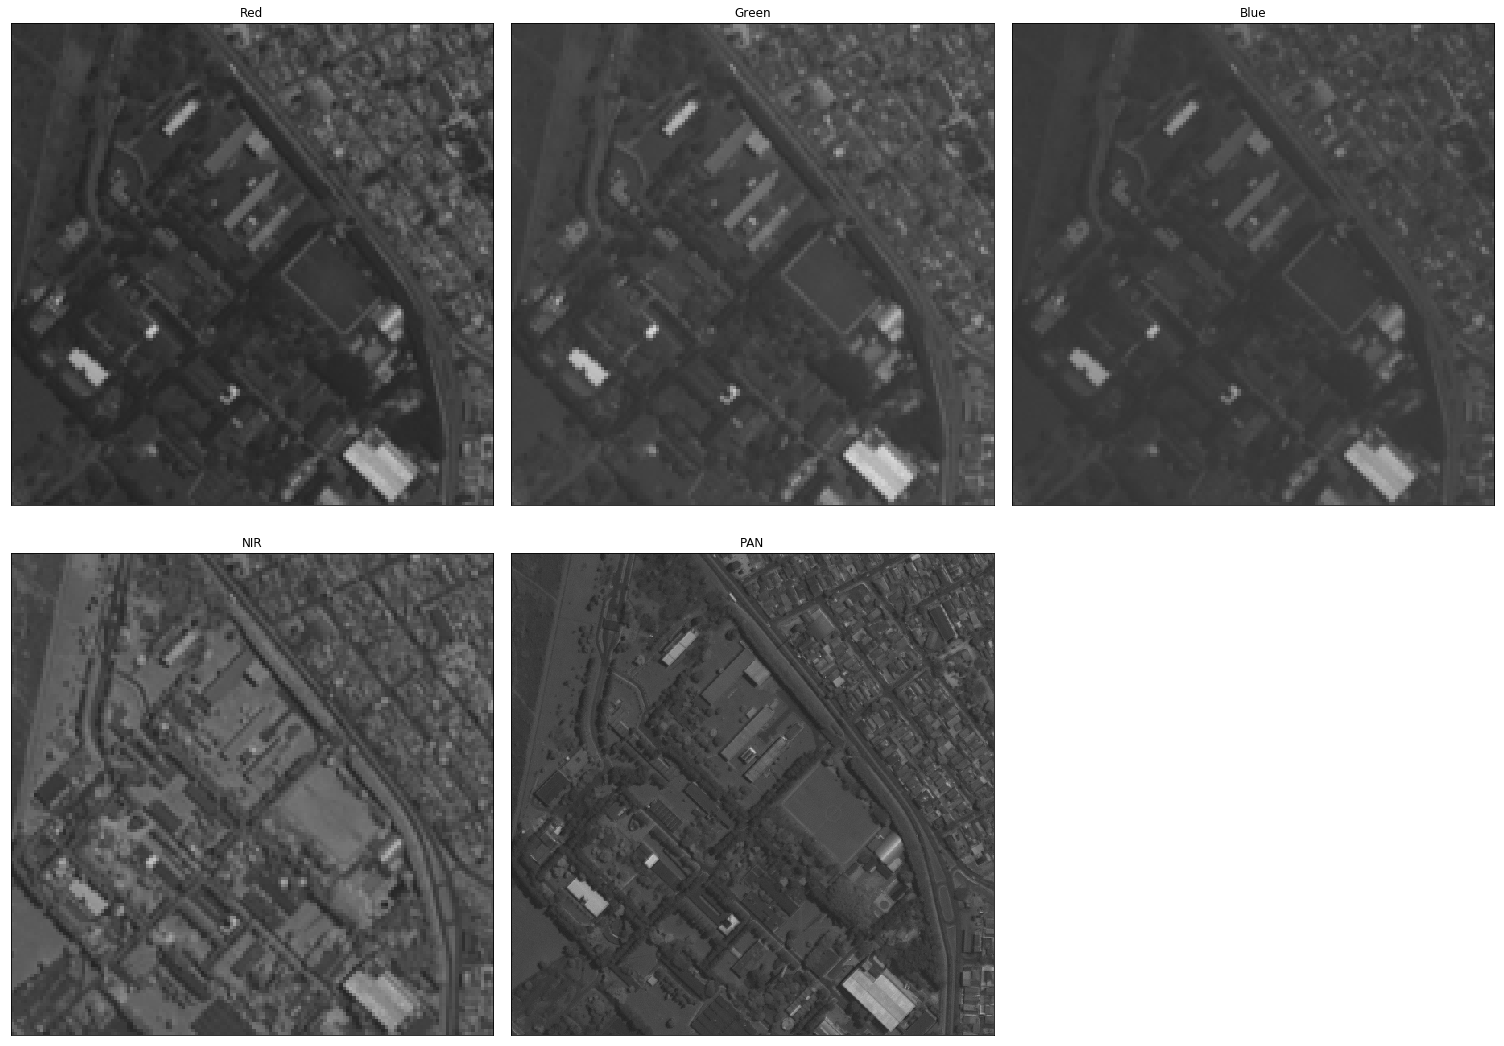

In [3]:
fig = plt.figure(figsize = (21,15))

plt.subplot(2, 3, 1)
plt.imshow(r, cmap = 'gray')
plt.title('Red')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(g, cmap = 'gray')
plt.title('Green')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(b, cmap = 'gray')
plt.title('Blue')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(nir, cmap = 'gray')
plt.title('NIR')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(pan, cmap = 'gray')
plt.title('PAN')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

Podemos ver que a banda ```PAN``` é mais nitida que as demais bandas. Isto acontece pois tem maior resolução.

Para realizar a conversão para do sistema de cores ```RGB``` para ```HSV```, primeiro precisamos juntar as bandas de interesse. A tabela abaixo mostra quais bandas iremos escolher para formar cada uma das imagens, isto é, para a primeira delas iremos colocar as bandas correspondentes para formar uma imagem ```RGB```, porém para a segunda iremos usar as bandas ```NIR``` (R), ```R``` (G) e ```G``` (B), 

|   R   |   G   |   B   |
|:-----:|:-----:|:-----:|
|```R```|```G```|```B```|
|```NIR```|```R```|```G```|


### (a) Primeiro Método: Conversão para o sistema de cores ```HSV```

In [4]:
rgb = PIL.Image.merge(mode = 'RGB', bands = [r, g, b])
nirrg = PIL.Image.merge(mode = 'RGB', bands = [nir, r, g])

In [5]:
print(np.asarray(r).shape)
print(np.asarray(g).shape)
print(np.asarray(b).shape)
print(np.asarray(nir).shape)
print(np.asarray(pan).shape)

(150, 150)
(150, 150)
(150, 150)
(150, 150)
(600, 600)


Depois de carregar as imagens, para realizar o PAN-Sharpening, precisamos que as bandas ```R```, ```G```, ```B``` e ```NIR``` estejam com as mesmas dimensões que a banda ```PAN```.

Na célula de cima podemos ver que a banda ```PAN``` tem dimensões $(600, 600)$, enquanto que as demais bandas tem dimensões $(150, 150)$.

In [6]:
rgb = rgb.resize((600, 600), resample = PIL.Image.BICUBIC)
nirrg = nirrg.resize((600, 600), resample = PIL.Image.BICUBIC)

In [7]:
print(np.asarray(rgb).shape)

(600, 600, 3)


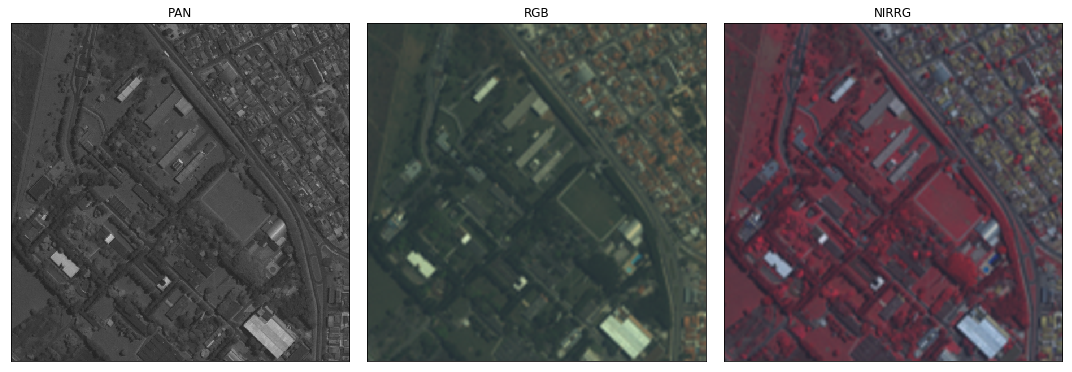

In [8]:
fig = plt.figure(figsize = (15,7))

plt.subplot(1, 3, 1)
plt.imshow(pan)
plt.title('PAN')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(rgb)
plt.title('RGB')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(nirrg)
plt.title('NIRRG')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

Podemos ver que na imagem com a banda ```NIR```, a vegetação tem um destaque em tonalidade vermelha.

In [9]:
rgb_hsv = rgb.convert('HSV')
nirrg_hsv = nirrg.convert('HSV')

In [10]:
rgb_hsv = np.asarray(rgb_hsv)
rgb_hsv.setflags(write = 1)
nirrg_hsv = np.asarray(nirrg_hsv)
nirrg_hsv.setflags(write = 1)

In [11]:
rgb_hsv[:, :, 2] = np.asarray(pan)
nirrg_hsv[:, :, 2] = np.asarray(pan)

In [12]:
rgb_hsv = PIL.Image.fromarray(rgb_hsv, mode = 'HSV')
nirrg_hsv = PIL.Image.fromarray(nirrg_hsv, mode = 'HSV')

In [13]:
rgb_pan = rgb_hsv.convert('RGB')
nirrg_pan = nirrg_hsv.convert('RGB')

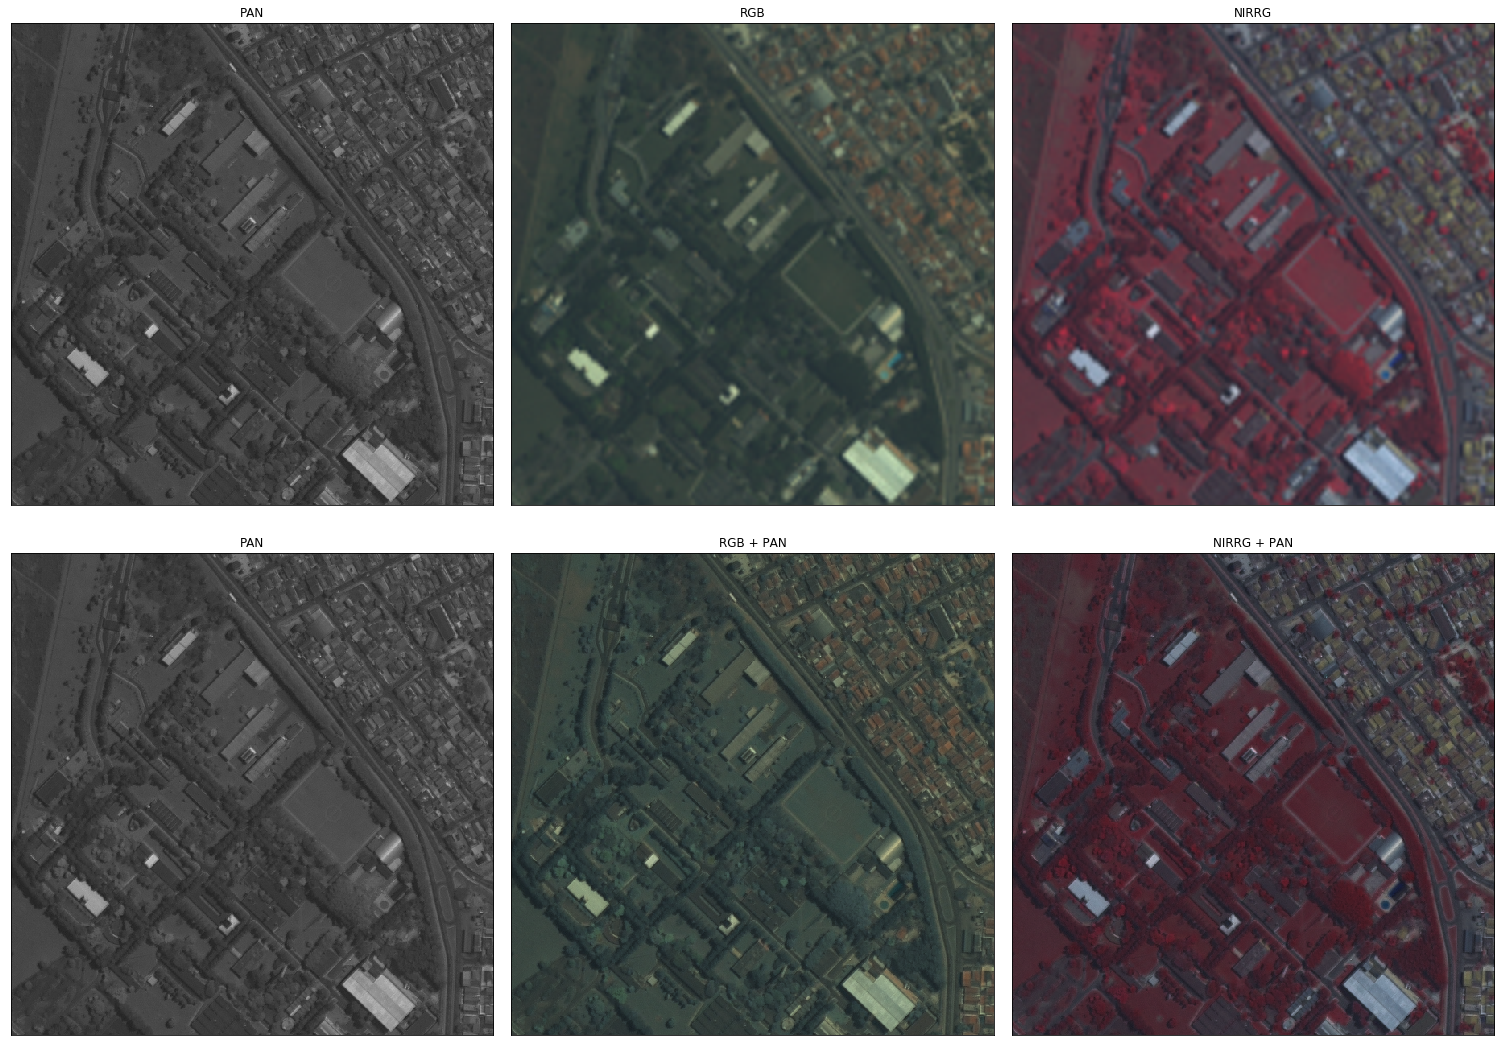

In [18]:
fig = plt.figure(figsize = (21,15))

plt.subplot(2, 3, 1)
plt.imshow(pan)
plt.title('PAN')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(rgb)
plt.title('RGB')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(nirrg)
plt.title('NIRRG')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(pan)
plt.title('PAN')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(rgb_pan)
plt.title('RGB + PAN')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 6)
plt.imshow(nirrg_pan)
plt.title('NIRRG + PAN')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

As imagens acima mostram o resultado para as imagens com bandas ```RGB``` e ```NIRRG```, antes e depois do PAN-Sharpening. Como era esperado na segunda linha temos as imagens com a resolução maior, uma vez que estas imagens estão com as intensidades corridas pela banda ```PAN```.

### (b) Segundo Método: **PCA**

Além da conversão para o sistema de cores ```HSV``` e substituição das intensidades da banda ```PAN``` nos valores de intensidade do ```HSV```, podemos realizar o PAN-Sharpening utilizando Análise de Componentes Principais **PCA**.

In [19]:
rgb = rgb.resize((600, 600), resample = PIL.Image.BICUBIC)
nirrg = nirrg.resize((600, 600), resample = PIL.Image.BICUBIC)

In [37]:
rgb_array = np.asarray(rgb).astype(float)

In [38]:
rgb_array.shape

(600, 600, 3)

In [42]:
rgb_array = rgb_array.reshape(-1, 3)

In [ ]:
np.dot(rgb_array, rgb_array.T)